# Data Science Aplicada à Área de Saúde

## Avaliação do Modelo

Depois de executar a limpeza e processamento nos dados, a engenharia de recursos, a seleção de variáveis e, é claro, implementar um modelo e obter alguma saída em formas de probabilidade ou classe, o próximo passo é descobrir a eficácia do modelo com base em alguma métrica usando conjuntos de dados de teste. 

Diferentes métricas de desempenho são usadas para avaliar diferentes algoritmos de aprendizado de máquina. Focaremos agora mas métricas usadas para problemas de classificação. 

Podemos usar métricas de desempenho de classificação como Accuracy, AUC (Area Under The Curve), Precision, Recall, entre outras.

As métricas que você escolhe para avaliar seu modelo de aprendizado de máquina são muito importantes. A escolha de métricas influencia a forma como o desempenho dos algoritmos de aprendizado de máquina é medido e comparado. 

## Métricas de Classificação

Uma área importante da modelagem preditiva em Ciência de Dados é a Classificação. 

A classificação consiste em tentar prever a qual classe uma amostra específica de uma população pertence. 

Por exemplo, se estamos tentando prever se um determinado paciente será hospitalizado, as duas classes possíveis são hospitalizado (classe positiva) e não-hospitalizado (classe negativa). O modelo de classificação tenta prever se cada paciente será hospitalizado ou não. Em outras palavras, a classificação está simplesmente tentando prever qual balde (positivo previsto vs negativo previsto) uma amostra específica da população deve ser colocada como visto abaixo.

<img src="imagens/classification.png" alt="Drawing" style="width: 400px;"/>

E ao treinar o modelo preditivo de classificação, precisamos avaliar sua performance. Curiosamente, existem muitas maneiras diferentes de avaliar o desempenho. A maioria dos Cientistas de Dados que usam Python para modelagem preditiva trabalha com o pacote Python chamado Scikit-Learn. O Scikit-Learn contém muitas funções internas para analisar o desempenho dos modelos.

Vamos estudar algumas dessas métricas e escreveremos nossas próprias funções do zero para entender a matemática por trás de algumas delas.

As funções abaixo pertencem ao pacote `sklearn.metrics` e permitem calcular as principais métricas de classificação:

    - confusion_matrix
    - accuracy_score
    - recall_score
    - precision_score
    - f1_score
    - roc_curve
    - roc_auc_score

## Compreendendo as Probabilidades Previstas Para Avaliação das Métricas

Quando executamos o comando abaixo (após treinar um modelo de classificação), obtemos as probabilidades para cada classe (considerando nesse exemplo classificação binária):

modelo.predict_proba(dataset_teste) 

O resultado é um array numpy de duas dimensões com os possíveis valores:

[[0.6161618 0.3838382 ]
[0.54156373 0.45843627]]

Ou seja, o modelo fez a previsão de 2 instâncias. Para a primeira instância, 61% de pertencer a classe 0 e 38% de pertencer a classe 1 e para a segunda instância 54% de pertencer a classe 0 e 45% de pertencer a classe 1.

Uma vez que temos as probabilidades, podemos definir um threshold (limite) para só então classificarmos o resultado como classe 0 ou classe 1. Por exemplo, ao considerarmos o threshold 0.5 podemos interpretar os 2 resultados acima como pertencentes a classe 0 pois estão acima do threshold.

O threshold é a linha de corte (cutoff). Como exemplo podemos utilizar o threshold de 0.5 mas você pode ajustá-lo dependendo do que for mais importante, minimizar os falsos negativos ou falsos positivos ou em outras palavras priorizar o recall ou a precisão, como veremos mais adiante.

Considere o exemplo de previsão de doenças. Um falso negativo é pior pois o paciente estaria com a doença e poderia ficar sem atendimento enquanto que um falso positivo faria com o que o paciente tomasse medicamento ou fosse internado sem necessidade, uma vez que ele não tem a doença.

Para tomar as decisões corretas, precisamos compreender as métricas e como interpretá-las.

## Carregando o Arquivo com Previsões de 2 Modelos

Preparando as Previsões de Dois Modelos Para Cálculo e Interpretação das Métricas

Vamos carregar um conjunto de dados de amostra com os rótulos reais (y_true) e as probabilidades de previsão (y_pred) para dois modelos (modelo_RF e modelo_LR). Aqui as probabilidades são a probabilidade de serem da classe 1.

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
import pandas as pd
pd.__version__

'1.0.1'

In [3]:
import numpy as np
np.__version__

'1.18.1'

In [4]:
import matplotlib as m
m.__version__

'3.2.0'

In [5]:
# Carregando os dados
import pandas as pd
previsoes = pd.read_csv('dados/previsoes.csv')
previsoes.head()

,y_true,y_pred_modelo_RF,y_pred_modelo_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


Na maioria dos projetos de Ciência de Dados, você definirá um limite para definir quais probabilidades de previsão são rotuladas como positivas previstas versus negativas previstas. Por enquanto, vamos supor que o limite seja 0.5. Vamos adicionar duas colunas que convertem as probabilidades em rótulos previstos.

In [6]:
# Define o limite e converte as probabilidades em previsões de classe
limite = 0.5
previsoes['classe_prevista_RF'] = (previsoes.y_pred_modelo_RF >= 0.5).astype('int')
previsoes['classe_prevista_LR'] = (previsoes.y_pred_modelo_LR >= 0.5).astype('int')
previsoes.head()

,y_true,y_pred_modelo_RF,y_pred_modelo_LR,classe_prevista_RF,classe_prevista_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


## Matriz de Confusão (Confusion Matrix)

A Matriz de Confusão é uma das ferramentas de análise de classificação mais intuitivas e fáceis, usada para encontrar a correção e a precisão do modelo. É empregada em tarefas de classificação em que a saída pode ser de dois ou mais tipos de classes.

Antes de mergulhar no que é a matriz de confusão e o que ela transmite, digamos que estamos resolvendo um problema de classificação em que estamos prevendo se uma pessoa está com pneumonia ou não.

Vamos dar um rótulo (ou label, ou etiqueta) à nossa variável alvo:

- 1: Quando uma pessoa está com pneumonia. (classe positiva)
- 0: Quando uma pessoa NÃO está com pneumonia. (classe negativa)

Bem! Agora que identificamos o problema, a Matriz de Confusão é uma tabela com duas dimensões ("Real" e "Previsto") e conjuntos de "classes" em ambas as dimensões. Nossas classificações reais são colunas e as previstas são linhas.

<img src="imagens/confusion_matrix.png" alt="Drawing" style="width: 400px;"/>

A Matriz de Confusão, por si só, não é uma medida de desempenho como tal, mas quase todas as métricas de desempenho são baseadas na Matriz de Confusão e nos números dentro dela.

- Classe Positiva = 1
- Classe Negativa = 0

Dado um rótulo real e um rótulo previsto, a primeira coisa que podemos fazer é dividir nossas amostras em 4 tipos:

    - True Positive - real = 1, previsto = 1
    - False Positive - real = 0, previsto = 1
    - False Negative - real = 1, previsto = 0
    - True Negative - real = 0, previsto = 0

- TP - O caso em que uma pessoa está realmente com pneumonia (1) e o modelo classifica como pneumonia (1).

- FP - Uma pessoa que NÃO está com pneumonia e o modelo classifica o caso como pneumonia.

- FN - Uma pessoa tem pneumonia e o modelo classifica o caso como não-pneumonia.

- TN - O caso em que uma pessoa NÃO está com pneumonia e o modelo classifica como não-pneumonia.

Podemos calcular cada elemento da Matriz de Confusão, conforme abaixo:

In [7]:
# Funções para calcular os resultados de um modelo de classificação

def find_TP(y_true, y_pred):
    # conta o número de true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))

def find_FN(y_true, y_pred):
    # conta o número de false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))

def find_FP(y_true, y_pred):
    # conta o número de false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))

def find_TN(y_true, y_pred):
    # conta o número de true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))

# Imprime
print('TP:', find_TP(previsoes.y_true.values, previsoes.classe_prevista_RF.values))
print('FN:', find_FN(previsoes.y_true.values, previsoes.classe_prevista_RF.values))
print('FP:', find_FP(previsoes.y_true.values, previsoes.classe_prevista_RF.values))
print('TN:', find_TN(previsoes.y_true.values, previsoes.classe_prevista_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


Vamos escrever uma função que calcule todos os quatro para nós.

In [8]:
# Criando nossa própria função para a Confusion Matrix

import numpy as np

def find_conf_matrix_values(y_true, y_pred):
    # Calcula TP, FN, FP, TN
    TP = find_TP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    TN = find_TN(y_true, y_pred)
    return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true, y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [9]:
# Executa a função
my_confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

array([[5519, 2360],
       [2832, 5047]])

Podemos obter a Matriz de Confusão do Scikit-Learn, que recebe como entradas as etiquetas reais e as etiquetas previstas.

In [10]:
import sklearn as sk
sk.__version__

'0.22.2'

In [11]:
# Confusion Matrix no Scikit-Learn
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# Importa a função
from sklearn.metrics import confusion_matrix

# Cria a Confusion Matrix
confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

array([[5519, 2360],
       [2832, 5047]])

In [12]:
# Ajustando o label para melhor compreensão da Confusion Matrix

# Importa a função
from sklearn.metrics import confusion_matrix

# Labels
labels = [1, 0]

# Confusion Matrix com definição dos labels
cm = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values, labels)
print(cm)

[[5047 2832]
 [2360 5519]]


Onde há 5047 verdadeiros positivos, 2360 falsos positivos, 2832 falsos negativos e 5519 verdadeiros negativos. Vamos agora construir um plot para facilitar a visualização.

In [13]:
# Plot da Confusion Matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  

# Labels
labels = [1, 0]

# Confusion Matrix com definição dos labels
cm = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values, labels)

# Annotation
annot = np.empty_like(cm).astype(str)

# Heatmap
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot = annot, fmt = '', annot_kws = {"size": 14})
plt.ylabel('Label Real')
plt.xlabel('Label Previsto')
plt.title('Confusion Matrix')
plt.show()

<Figure size 640x480 with 2 Axes>

In [14]:
! pip install mlxtend

In [15]:
import mlxtend as mlx
mlx.__version__

'0.17.2'

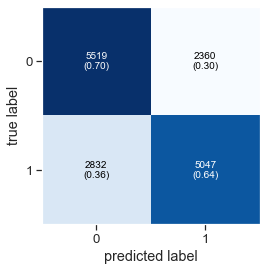

In [16]:
# Plot usando Mlextend
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Labels
labels = [0, 1]

# Confusion Matrix com definição dos labels
cm = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values, labels)

# Plot
fig, ax = plot_confusion_matrix(conf_mat = cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = False)
plt.show()

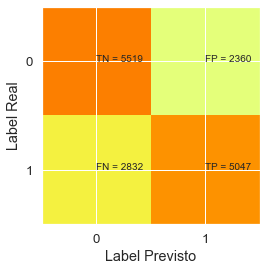

In [17]:
# Plot com texto
import matplotlib.pyplot as plt  
plt.clf()

# Confusion Matrix com definição dos labels
cm = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['0','1']
plt.ylabel('Label Real')
plt.xlabel('Label Previsto')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

Vamos comparar nossa função com a função do Scikit-Learn:

In [18]:
assert  np.array_equal(my_confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values),\
                       confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values)), 'my_confusion_matrix() não está correta para o modelo RF'

assert  np.array_equal(my_confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values),\
                       confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values)), 'my_confusion_matrix() não está correta para o modelo LR'

Considerando esses quatro intervalos (TP, FP, FN, TN), podemos calcular muitas outras métricas de desempenho.

## Quando Minimizar as Taxas de FP e FN

Sabemos que haverá algum erro associado a todos os modelos que usamos para prever a verdadeira classe da variável de destino. Isso resultará em falsos positivos e falsos negativos (isto é, o modelo classifica as coisas incorretamente em comparação com a classe real).

Não existe uma regra rígida que diga o que deve ser minimizado em todas as situações. Depende apenas das necessidades da empresa e do contexto do problema que você está tentando resolver. Com base nisso, podemos querer minimizar falsos positivos ou falsos negativos.

- TP - O caso em que uma pessoa está realmente com pneumonia (1) e o modelo classifica como pneumonia (1).

- FP - Uma pessoa que NÃO está com pneumonia e o modelo classifica o caso como pneumonia.

- FN - Uma pessoa tem pneumonia e o modelo classifica o caso como não-pneumonia.

- TN - O caso em que uma pessoa NÃO está com pneumonia e o modelo classifica como não-pneumonia.

### 1. Minimizando Falsos Negativos:

Digamos que, em nosso exemplo de problema de detecção de pneumonia, de 100 pessoas, apenas 5 pessoas tenham pneumonia. Nesse caso, queremos classificar corretamente todos os pacientes com pneumonia.

Um modelo ruim (que esteja prevendo todos como não-pneumonia) nos dará uma acurácia de 95%. Precisamos então ajustar o modelo a fim de conseguir detectar os casos de pneumonia.

Mas, para capturar todos os casos de pneumonia, podemos acabar fazendo uma classificação quando a pessoa que NÃO está com pneumonia é classificada com pneumonia (um falso positivo). Isso é menos perigoso do que NÃO identificar / capturar um paciente com pneumonia, pois enviaremos os casos de pneumonia para exames e relatórios adicionais. Mas a previsão errada de um paciente com pneumonia será um grande erro, pois nenhum exame adicional será feito.

Ou seja, nesses casos, o falso positivo pode causar menos danos do que o falso negativo. Devemos ajustar nosso modelo para que casos de falsos negativos sejam reduzidos ao máximo possível. A definição do limite (threshold) pode nos ajudar com isso!

### 2. Minimizando Falsos Positivos:

Para uma melhor compreensão dos falsos positivos, vamos usar um exemplo diferente em que o modelo classifica se um email é spam ou não.

Digamos que você esteja esperando um e-mail importante, como receber uma resposta de um recrutador ou aguardar uma carta de admissão de uma universidade. Vamos atribuir um rótulo à variável de destino e dizer 1: "O email é um spam" e 0: "O email não é um spam".

Suponha que o modelo classifique o e-mail importante que você está esperando desesperadamente, como spam (caso de falso positivo). Agora, nessa situação, isso é pior do que classificar um email de spam como não-spam, pois nesse caso, ainda podemos prosseguir e excluí-lo manualmente, e não é difícil se isso acontece de vez em quando. Portanto, no caso da classificação de e-mail de spam, minimizar os falsos positivos é mais importante que os falsos negativos.

## Acurácia

A acurácia nos problemas de classificação é o número de previsões corretas feitas pelo modelo em todos os tipos de previsões feitas.

<img src="imagens/acuracia.png" alt="Drawing" style="width: 400px;"/>

No numerador, estão nossas previsões corretas (Verdadeiros positivos e Verdadeiros Negativos), marcadas em vermelho na figura acima, e no denominador, estão todas as previsões feitas pelo modelo (certo e errado).

- Quando usar a acurácia?

A acurácia é uma boa medida quando as classes da variável alvo estão quase equilibradas.

Exemplo: 60% de imagens de frutas são maçã e 40% são laranjas. Um modelo que prevê se uma nova imagem é maçã ou laranja 97% das vezes corretamente, é uma medida muito boa neste exemplo.

- Quando NÃO usar acurácia?

A acurácia NUNCA deve ser usada como métrica quando as classes da variável alvo são maioria de uma classe.

Exemplo: no nosso exemplo de detecção de pneumonia com 100 pessoas, apenas 5 pessoas têm pneumonia. Digamos que nosso modelo é muito ruim e prediz todos os casos como não-pneumonia. Ao fazer isso, classificou corretamente os 95 pacientes não-pneumonia e 5 pacientes com pneumonia foram classificados como não-pneumonia (nosso modelo errou 5 vezes). Agora, mesmo que o modelo seja terrível na previsão de pneumonia, a acurácia de um modelo tão ruim também é de 95%.

### Calculando a Acurácia

In [19]:
# Acurácia do Modelo de RandomForest

# Importa a função
from sklearn.metrics import accuracy_score

# Calcula a acurácia
accuracy_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

0.6705165630156111

In [20]:
# Acurácia do Modelo de Regressão Logística

# Importa a função
from sklearn.metrics import accuracy_score

# Calcula a acurácia
accuracy_score(previsoes.y_true.values, previsoes.classe_prevista_LR.values)

0.6158141896179719

Usando a acurácia como uma métrica de desempenho, o modelo RF é mais preciso que o modelo LR. Então, devemos parar por aqui e dizer que o modelo de RF é o melhor? Não! A acurácia nem sempre é a melhor métrica a ser usada para avaliar modelos de classificação. 

A acurácia é a proporção de predições corretas, sem levar em consideração o que é positivo e o que é negativo. Esta medida é altamente suscetível a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.

## Recall (Sensibilidade)

Recall (também conhecida como sensibilidade) é a fração de eventos positivos que foram previstos corretamente, como mostrado abaixo:

<img src="imagens/recall.png" alt="Drawing" style="width: 300px;"/>

Recall é uma medida que nos diz que proporção de pacientes que realmente tiveram pneumonia foi diagnosticada pelo modelo como tendo pneumonia. Os positivos reais (pessoas com pneumonia) são TP e FN e as pessoas diagnosticadas pelo modelo com pneumonia são TP. 

(Nota: FN está incluído porque a pessoa realmente teve pneumonia, embora o modelo previsse o contrário).

Portanto, Recall é a proporção de verdadeiros positivos: a capacidade do sistema em predizer corretamente a condição para casos que realmente a têm.

O Recall pode ser usado em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto Recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

In [21]:
# Recall do Modelo de RandomForest

# Importa a função
from sklearn.metrics import recall_score

# Calcula o recall
recall_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

0.6405635232897576

In [22]:
# Recall do Modelo de Regressão Logística

# Importa a função
from sklearn.metrics import recall_score

# Calcula o recall
recall_score(previsoes.y_true.values, previsoes.classe_prevista_LR.values)

0.5430892245208783

Um método para aumentar o recall é aumentar o número de amostras que você define como positivo previsto, diminuindo o limite do positivo previsto. Infelizmente, isso também aumentará o número de falsos positivos. Outra métrica de desempenho chamada precisão leva isso em consideração.

## Precision

Precisão é a fração de eventos positivos previstos que são realmente positivos, como mostrado abaixo:

<img src="imagens/precision.png" alt="Drawing" style="width: 300px;"/>

A precisão é uma medida que nos diz qual a proporção de pacientes que diagnosticamos como tendo pneumonia, que realmente tinham pneumonia. Os positivos previstos (as pessoas consideradas com pneumonia) são TP e FP e as pessoas que realmente têm pneumonia são TP.

A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

In [23]:
# Precision do Modelo de RandomForest

# Importa a função
from sklearn.metrics import precision_score

# Calcula o precision 
precision_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

0.681382476036182

In [24]:
# Precision do Modelo de Regressão Logística

# Importa a função
from sklearn.metrics import precision_score

# Calcula o precision 
precision_score(previsoes.y_true.values, previsoes.classe_prevista_LR.values)

0.6355265112134264

Nesse caso, parece que o modelo de RF é melhor no recall e na precisão. Mas o que você faria se um modelo fosse melhor em recall e o outro fosse melhor em precisão. Um método usado por alguns Cientistas de Dados é a média harmônica entre eles, chamado de F1 Score.

## Quando Usar o Precision e Quando Usar o Recall?

O recall nos fornece informações sobre o desempenho de um classificador em relação a falsos negativos (quantos perdemos), enquanto a precisão nos fornece informações sobre seu desempenho em relação a falsos positivos (quantos capturamos).

Precisão é ser preciso. Portanto, mesmo que tenhamos conseguido capturar apenas um caso de pneumonia e o tenhamos capturado corretamente, somos 100% precisos.

Recall se refere a capturar todos os casos que têm "pneumonia" com a resposta "pneumonia". Portanto, se simplesmente prevemos todos os casos como "pneumonia", temos 100% de recall.

Basicamente, se quisermos nos concentrar mais na minimização de falsos negativos, gostaríamos que o nosso recall fosse o mais próximo possível de 100%, sem que a precisão fosse muito ruim e se queremos nos concentrar em minimizar os falsos positivos, nosso foco deve ser precisão o mais próximo possível de 100%.

## Especificidade

Especificidade é uma medida que nos diz que proporção de pacientes que NÃO tiveram pneumonia foi prevista pelo modelo como não-pneumonia. Os negativos reais (as pessoas que NÃO têm pneumonia) são FP e TN e as pessoas diagnosticadas que não têm pneumonia são TN. 

(Nota: FP está incluído porque a pessoa realmente NÃO tem pneumonia, embora o modelo previsse o contrário).

<img src="imagens/especificidade.png" alt="Drawing" style="width: 400px;"/>

In [25]:
# Calculando a Especificidade do Modelo de RandomForest

TN, FP, FN, TP = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_RF.values).ravel()

Especificidade = TN / (TN + FP)

print(Especificidade)

0.7004696027414646


In [26]:
# Calculando a Especificidade do Modelo de Regressão Logística

TN, FP, FN, TP = confusion_matrix(previsoes.y_true.values, previsoes.classe_prevista_LR.values).ravel()

Especificidade = TN / (TN + FP)

print(Especificidade)

0.6885391547150653


## Sensibilidade x Especificidade

- Sensibilidade (Sensibility): a proporção de casos positivos que foram identificados corretamente.

- Especificidade (Specificity): a proporção de casos negativos que foram identificados corretamente. 

- Acurácia (Accuracy): a proporção de casos que foram corretamente previstos, sejam eles verdadeiro positivo ou verdadeiro negativo.

## F1 Score

O F1 Score é a média harmônica de recall e precision, com uma pontuação mais alta para um modelo melhor. 

A média harmônica é uma média quando x e y são iguais. Mas quando x e y são diferentes, fica mais próximo do número menor em comparação com o número maior. O F1 Score é calculado usando a seguinte fórmula:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

<img src="imagens/f1-score.png" alt="Drawing" style="width: 400px;"/>

O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando temos um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

In [27]:
# F1-Score do Modelo de RandomForest

# Importa a função
from sklearn.metrics import f1_score

# Calcula o F1-Score
f1_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)

0.660342797330891

In [28]:
# F1-Score do Modelo de Regressão Logística

# Importa a função
from sklearn.metrics import f1_score

# Calcula o F1-Score
f1_score(previsoes.y_true.values, previsoes.classe_prevista_LR.values)

0.5856830002737475

## Alterando o Limite

Até agora, assumimos que definimos um limite de 0.5 para selecionar quais amostras são previstas como positivas. Se alterarmos esse limite, as métricas de desempenho serão alteradas. Como mostrado abaixo:

In [29]:
# Métricas com Limite de 0.5
print('Scores com Limite de 0.5')
print('Acurácia RF: %.3f'%(accuracy_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)))
print('Recall RF: %.3f'%(recall_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)))
print('Precision RF: %.3f'%(precision_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)))
print('F1-Score RF: %.3f'%(f1_score(previsoes.y_true.values, previsoes.classe_prevista_RF.values)))

Scores com Limite de 0.5
Acurácia RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1-Score RF: 0.660


In [30]:
# Métricas com Limite de 0.25
print('Scores com Limite de 0.25')
print('Acurácia RF: %.3f'%(accuracy_score(previsoes.y_true.values, (previsoes.y_pred_modelo_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(recall_score(previsoes.y_true.values, (previsoes.y_pred_modelo_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(precision_score(previsoes.y_true.values, (previsoes.y_pred_modelo_RF >= 0.25).astype('int').values)))
print('F1-Score RF: %.3f'%(f1_score(previsoes.y_true.values, (previsoes.y_pred_modelo_RF >= 0.25).astype('int').values)))

Scores com Limite de 0.25
Acurácia RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1-Score RF: 0.668


Como avaliamos um modelo se não escolhemos um limite? Um método muito comum é usar a curva ROC (Receiver Operating Characteristic).

## Curva ROC e Score AUC

As curvas ROC são MUITO úteis para entender o equilíbrio entre a taxa de verdadeiros positivos e a taxa de falsos posiitivos. O Scikit-Learn incorporou funções para curvas ROC e para analisá-las. As entradas para essas funções (`roc_curve` e` roc_auc_score`) são os rótulos reais e as probabilidades previstas (não os rótulos previstos). 

Vamos começar usando `roc_curve` para fazer o gráfico ROC.

In [31]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(previsoes.y_true.values, previsoes.y_pred_modelo_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(previsoes.y_true.values, previsoes.y_pred_modelo_LR.values)

A função `roc_curve` retorna três listas:

    - thresholds = todas as probabilidades de previsão únicas em ordem decrescente
    - fpr = a taxa de falso positivo (FP / (FP + TN)) para cada threshold
    - tpr = a taxa de verdadeiro positivo (TP / (TP + FN)) (recall) para cada threshold

In [32]:
thresholds_RF

array([1.93052053, 0.93052053, 0.82363091, ..., 0.25654616, 0.25587275,
       0.17142947])

In [33]:
fpr_RF

array([0.       , 0.       , 0.       , ..., 0.9941617, 0.9941617,
       1.       ])

In [34]:
tpr_RF

array([0.00000000e+00, 1.26919660e-04, 5.33062571e-03, ...,
       9.99873080e-01, 1.00000000e+00, 1.00000000e+00])

Podemos traçar a curva ROC para cada modelo, como mostrado abaixo.

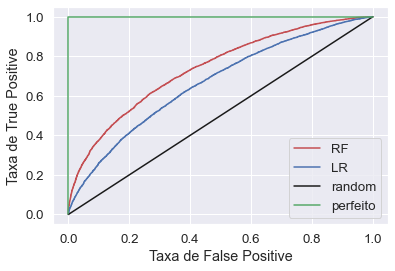

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr_RF, tpr_RF, 'r-', label = 'RF')
plt.plot(fpr_LR, tpr_LR, 'b-', label = 'LR')
plt.plot([0,1], [0,1], 'k-', label = 'random')
plt.plot([0,0,1,1], [0,1,1,1], 'g-', label = 'perfeito')
plt.legend()
plt.xlabel('Taxa de False Positive')
plt.ylabel('Taxa de True Positive')
plt.show()

Existem algumas coisas que podemos observar nesta figura.

- Um modelo que adivinha aleatoriamente o rótulo resultará na linha preta e você deseja ter um modelo que tenha uma curva acima dessa linha preta.
     
- Um ROC que está mais distante da linha preta é melhor, então RF (vermelho) parece melhor que LR (azul).
     
- Embora não seja visto diretamente, um limite alto resulta em um ponto no canto superior direito e um limite baixo em um ponto no canto inferior esquerdo. Isso significa que, à medida que você aumenta o limite, você obtém TPR mais alto a um custo de FPR mais alto.

Para analisar o desempenho, usaremos a métrica AUC (área abaixo da curva).

In [36]:
from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(previsoes.y_true.values, previsoes.y_pred_modelo_RF.values)
auc_LR = roc_auc_score(previsoes.y_true.values, previsoes.y_pred_modelo_LR.values)

print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


Como você pode ver, a área abaixo da curva para o modelo de RF é melhor que a LR.

Ao plotar a curva ROC, é bom adicionar a AUC à legenda, como mostrado abaixo.

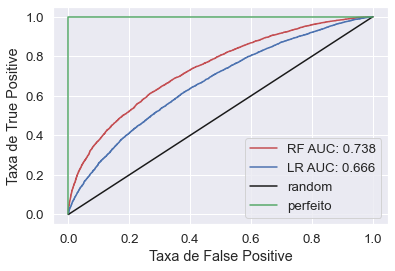

In [37]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-', label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR, tpr_LR,'b-', label = 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1], [0,1], 'k-', label = 'random')
plt.plot([0,0,1,1], [0,1,1,1], 'g-', label = 'perfeito')
plt.legend()
plt.xlabel('Taxa de False Positive')
plt.ylabel('Taxa de True Positive')
plt.show()

O modelo RF vence em todas as métricas de desempenho e seria nossa escolha como modelo final para as previsões.

## Classification Report

In [38]:
from sklearn.metrics import classification_report

report = classification_report(previsoes.y_true.values, previsoes.classe_prevista_RF.values)
print('Classification Report Para o Modelo RF')
print(report)

Classification Report Para o Modelo RF
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      7879
           1       0.68      0.64      0.66      7879

    accuracy                           0.67     15758
   macro avg       0.67      0.67      0.67     15758
weighted avg       0.67      0.67      0.67     15758



In [39]:
from sklearn.metrics import classification_report

report = classification_report(previsoes.y_true.values, previsoes.classe_prevista_LR.values)
print('Classification Report Para o Modelo LR')
print(report)

Classification Report Para o Modelo LR
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      7879
           1       0.64      0.54      0.59      7879

    accuracy                           0.62     15758
   macro avg       0.62      0.62      0.61     15758
weighted avg       0.62      0.62      0.61     15758



## Conclusão

Na análise preditiva, ao decidir entre dois modelos, é importante escolher pelo menos uma métrica de desempenho. Como você pode ver aqui, há muitas que você pode escolher (acurácia, recall, precisão, f1-score, AUC, etc). 

Por fim, você deve usar a métrica de desempenho mais adequada ao problema de negócios em questão. Muitos Cientistas de Dados preferem usar a AUC porque ela não requer a seleção de um limite e ajuda a equilibrar a taxa de verdadeiros positivos e a taxa de falsos positivos.

# Fim